In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
def function(x):        #define the function to integrate
    return np.cos(x)
cond_tol = 100
tolerance = 0.001
a = 0
b = 1.75

In [ ]:
x = np.linspace(a,b,1000)
y = function(x)
c = np.amin(y)   #lower bound in y
d = np.amax(y)   #upper bound in y

if(np.sign(c)==np.sign(d)):     #if the entire range of the function is above or below y=0,
        if(c<0):                # make sure that the area between the lower/upper bound and
            d = 0               # the x-axis is counted by setting that bound = 0
        elif(c>0):
            c = 0

In [ ]:
def integration(f,a,b,n):
        #f = the function to integrate
        #a = lower bound in x
        #b = upper bound in x
        #n = the number of random points to generate

     

        #create x and y arrays of random points
        xr = np.zeros(n)
        yr = np.zeros(n)
        x_above = []
        y_above = []
        x_below = []
        y_below = []
      
        for i in range(n):
            xr[i] = np.random.random()*(b-a)    #spread the random points over the area
            yr[i] = np.random.random()*(d-c)    # of the function
            if(c<0):                #if the lower bound is negative, shift the area down so that
                yr[i] += c          # some points are negative


        pos_area_pts = 0.0      #positive points - points above y=0
        neg_area_pts = 0.0      #negative points - points below y=0
        for i in range(n):
            if((yr[i]>=0 and f(xr[i])>=0) and np.fabs(yr[i])<=np.fabs(f(xr[i]))):   #for each random point:
                pos_area_pts += 1.0
                x_above.append(xr[i])
                y_above.append(yr[i])
                
                                              # •if it is positive & under the curve,
                                            #print("Positive point found: (%s, %s)"%(xr[i],yr[i]))              #   count in positive pts
            elif((yr[i]<0 and f(xr[i])<0) and np.fabs(yr[i])<=np.fabs(f(xr[i]))):   # •if it is negative & over the curve,
                neg_area_pts += 1.0
                x_below.append(xr[i])
                y_below.append(yr[i])
                 
                     #   count in negative pts
                                     #print("Negative point found: (%s, %s)"%(xr[i],yr[i]))

        area_pts = pos_area_pts - neg_area_pts      #subtract negative area from positive area
        ratio = area_pts/n                      #calculate the ratio of points under the curve to total points
        area = ratio*(b-a)*(d-c)            #apply the ratio to the total area within the bounds

        return area,x_above,y_above,x_below,y_below

In [ ]:
npoints = 100
npoints_1 = 150
print("May take some time. Please wait")
while cond_tol >= tolerance: 
    npoints += (npoints * 2)
    npoints_1 += (npoints_1 * 2)
    area = integration(function,a,b,npoints)[0]
    area_1 = integration(function,a,b,npoints_1)[0]


    

   
    mcintegral = 0.0
                                                   #for i in range(npoints):                                   #I average the result of 1000 calculations in order
    mcintegral += area
        
     
    mcintegral_1 = 0.0
    #for j in range(npoints_1):
    mcintegral_1 += area_1
    #mcintegral_1 /= npoints_1
    print(mcintegral)
 
    
   
      
    print(mcintegral_1)
    cond_tol = np.fabs(mcintegral_1 - mcintegral)

s= "npoints used =%d"%npoints
s1= "npoints1 used =%d"%npoints_1

print(s,s1)
print("done")

TypeError: 'Figure' object is not callable

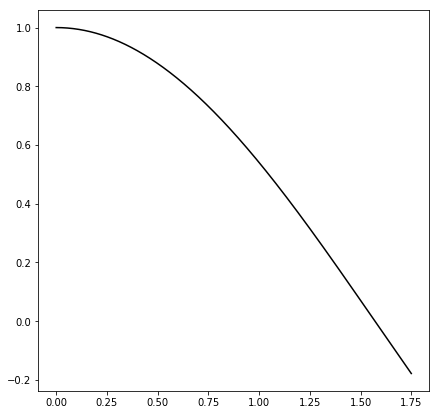

In [19]:
f= plt.figure(figsize=(7,7))
x = np.linspace(a,b,1000)
y = np.cos(x)
plt.plot(x,y,color='black',label='f(x)')
plt.plot(integration(f,a,b,npoints+npoints_1)[1],color_finder(f,a,b,npoints+npoints_1)[2],'.',color='red')
plt.plot(color_finder(f,a,b,npoints+npoints_1)[3],color_finder(f,a,b,npoints+npoints_1)[4],'.',color='blue')
s="F(a,b)=%d"%mcintegral
label =s
plt.xlim(a,b)
plt.ylim(c,d)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=True)